In [3]:
import pandas as pd
!python --version
!py -m pip install matplotlib as plt


Python 3.11.9


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Paolo Canigiula\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
!pip install wordcloud

In [78]:
newsapi_df = pd.read_csv('./articles_titledesc_sentiment.csv')
print(newsapi_df.columns)
newsapi_df = newsapi_df.drop(['text_vectors'], axis=1, errors='ignore')
print(newsapi_df.columns)


Index(['author', 'title', 'description', 'publishedAt', 'content',
       'source_name', 'polarity', 'subjectivity', 'domain', 'bias_mean',
       'bias_label', 'reliability_mean', 'bias_label_grouped',
       'title_and_desc', 'preprocessed_text', 'text_vectors'],
      dtype='object')
Index(['author', 'title', 'description', 'publishedAt', 'content',
       'source_name', 'polarity', 'subjectivity', 'domain', 'bias_mean',
       'bias_label', 'reliability_mean', 'bias_label_grouped',
       'title_and_desc', 'preprocessed_text'],
      dtype='object')


In [ ]:
newsapi_df['polarity'] = pd.to_numeric(newsapi_df['polarity'], errors='coerce')
newsapi_df['subjectivity'] = pd.to_numeric(newsapi_df['subjectivity'], errors='coerce')
filtered_sources = newsapi_df.groupby('source_name').filter(lambda x: len(x) > 100)
grouped_df = filtered_sources.groupby('source_name')[['polarity', 'subjectivity']].mean().reset_index()
grouped_df = grouped_df[grouped_df['source_name'] != 'Middle']

top_5_polarity = grouped_df.nlargest(5, 'polarity')
bottom_5_polarity = grouped_df.nsmallest(5, 'polarity')

top_5_subjectivity = grouped_df.nlargest(5, 'subjectivity')
bottom_5_subjectivity = grouped_df.nsmallest(5, 'subjectivity')

closest_to_zero_polarity = grouped_df.iloc[(grouped_df['polarity'].abs().argsort()[:5])]

print("\nSources Closest to Neutral Polarity (Closest to 0):")
print(closest_to_zero_polarity)
print("\nTop 5 Sources by Polarity:")
print(top_5_polarity)
print("\nBottom 5 Sources by Polarity:")
print(bottom_5_polarity)
print("\nTop 5 Sources by Subjectivity:")
print(top_5_subjectivity)
print("\nBottom 5 Sources by Subjectivity:")
print(bottom_5_subjectivity)



Sources Closest to Neutral Polarity (Closest to 0):
         source_name  polarity  subjectivity
142      The-sun.com -0.003067      0.423409
160  WPXI Pittsburgh  0.014533      0.270632
64          LADbible -0.014659      0.431609
78   Naturalnews.com  0.015010      0.364049
143         TheBlaze  0.015120      0.434426

Top 5 Sources by Polarity:
             source_name  polarity  subjectivity
8      Apartment Therapy  0.364985      0.547995
77   National Geographic  0.252678      0.446713
95       Popular Science  0.235322      0.522945
92             PetaPixel  0.225680      0.476996
169                ZDNet  0.215263      0.480098

Bottom 5 Sources by Polarity:
         source_name  polarity  subjectivity
64          LADbible -0.014659      0.431609
142      The-sun.com -0.003067      0.423409
160  WPXI Pittsburgh  0.014533      0.270632
78   Naturalnews.com  0.015010      0.364049
143         TheBlaze  0.015120      0.434426

Top 5 Sources by Subjectivity:
           source_name

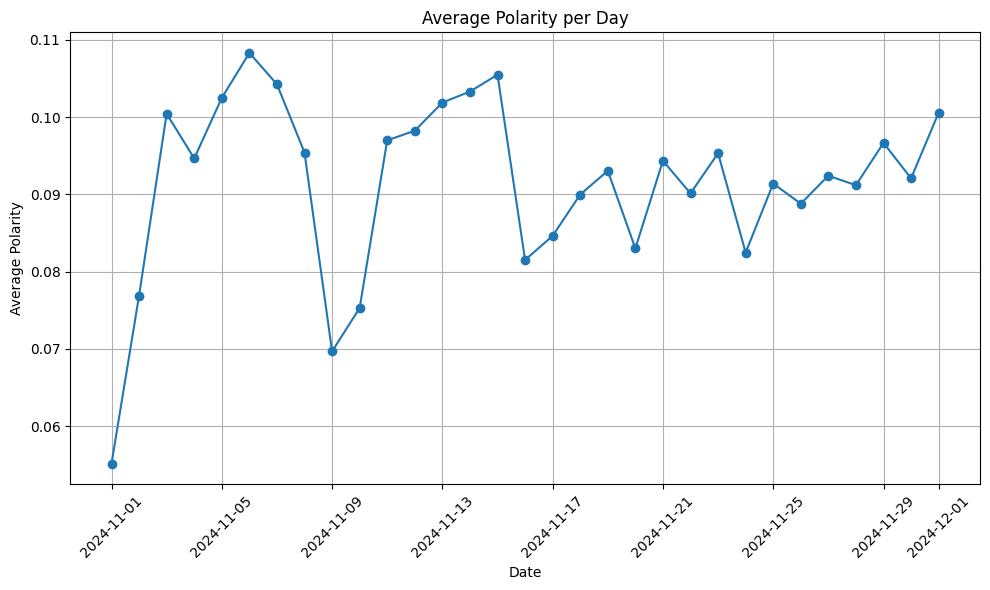

In [86]:
newsapi_df = pd.read_csv('./articles_titledesc_sentiment.csv')
newsapi_df['publishedAt'] = pd.to_datetime(newsapi_df['publishedAt'], errors='coerce')
newsapi_df = newsapi_df.dropna(subset=['publishedAt'])
newsapi_df['date'] = newsapi_df['publishedAt'].dt.date

average_polarity_per_day = newsapi_df.groupby('date')['polarity'].mean()

plt.figure(figsize=(10, 6))
average_polarity_per_day.plot(kind='line', marker='o')
plt.title('Average Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


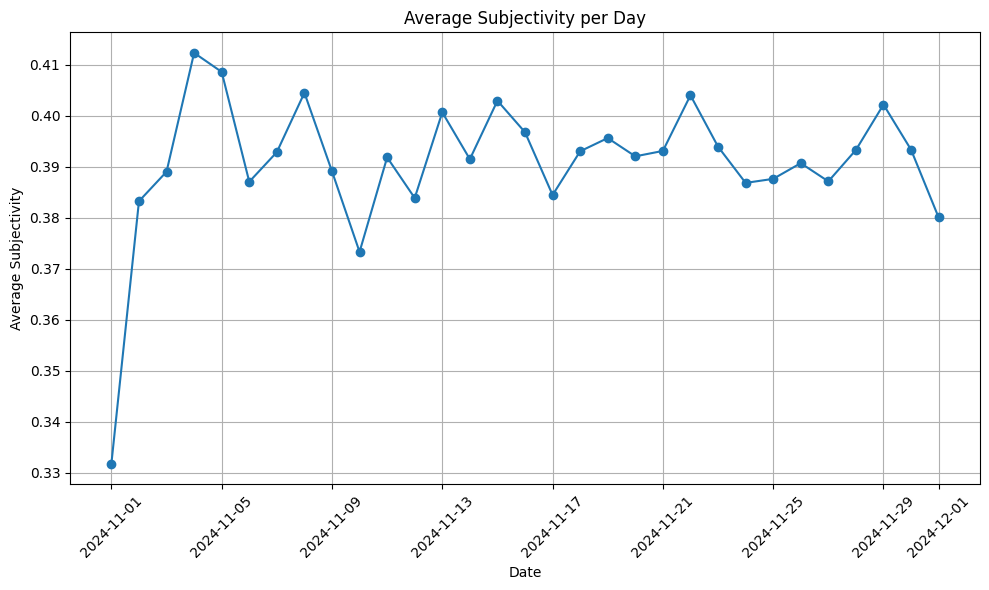

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

newsapi_df = pd.read_csv('./articles_titledesc_sentiment.csv')
newsapi_df['publishedAt'] = pd.to_datetime(newsapi_df['publishedAt'], errors='coerce')
newsapi_df = newsapi_df.dropna(subset=['publishedAt'])
newsapi_df['subjectivity'] = pd.to_numeric(newsapi_df['subjectivity'], errors='coerce')
newsapi_df = newsapi_df.dropna(subset=['subjectivity'])
newsapi_df['date'] = newsapi_df['publishedAt'].dt.date

average_subjectivity_per_day = newsapi_df.groupby('date')['subjectivity'].mean()

plt.figure(figsize=(10, 6))
average_subjectivity_per_day.plot(kind='line', marker='o')
plt.title('Average Subjectivity per Day')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Mean polarity for all articles on a range from [-1,1]: 0.0933085628406245
Mean subjectivity for all articles on a range from [0,1]: 0.3934499515900648


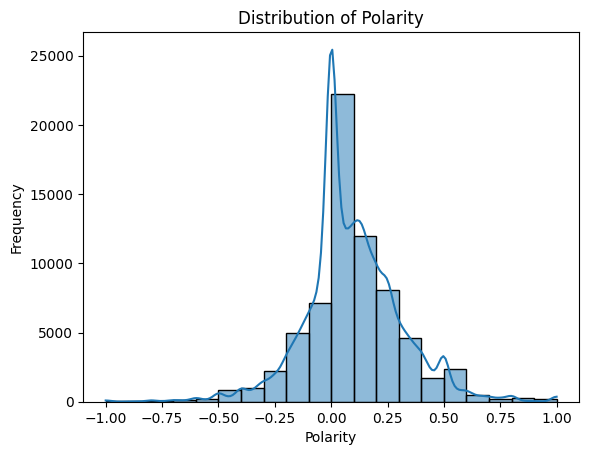

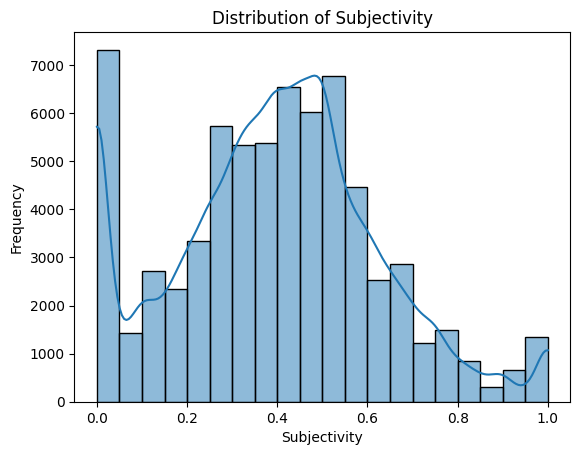

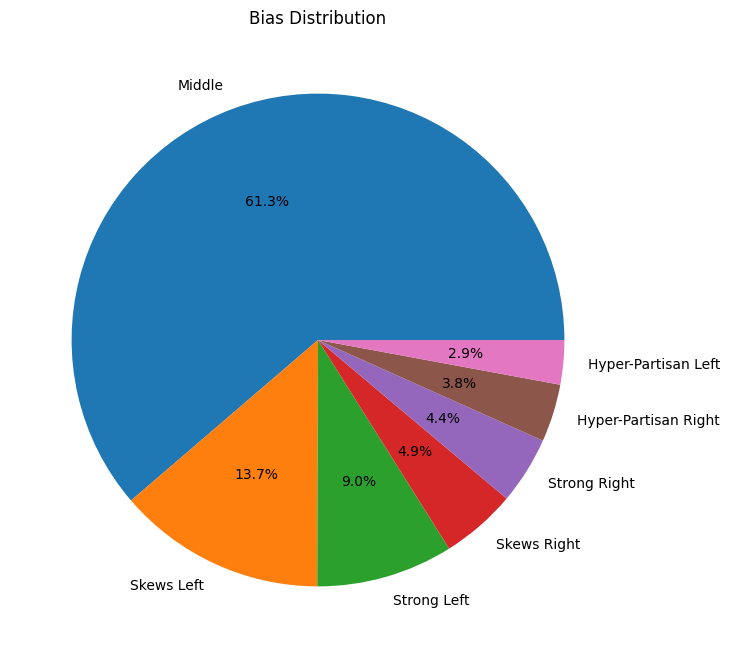

In [88]:
import seaborn as sns

newsapi_df = newsapi_df.dropna(subset=['subjectivity'])
print("Mean polarity for all articles on a range from [-1,1]: " + str(newsapi_df['polarity'].mean()))
print("Mean subjectivity for all articles on a range from [0,1]: " + str(newsapi_df['subjectivity'].mean()))

sns.histplot(newsapi_df['polarity'], bins=20, kde=True)
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

sns.histplot(newsapi_df['subjectivity'], bins=20, kde=True)
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

bias_distribution = newsapi_df['bias_label'].value_counts()
bias_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Bias Distribution')
plt.ylabel('')
plt.show()



In [66]:
election_df = pd.read_csv('./election_headlines.csv')
print(election_df.head())
print(election_df.columns)
print(election_df.dtypes)
election_df['publishedAt'] = pd.to_datetime(election_df['publishedAt'], errors='coerce')


   Unnamed: 0                                           Document  Topic  \
0           8  In Defense of ‘Resistance’ \n\nLast night, les...      0   
1          13  Can I vote in person instead of returning my m...      0   
2          14  Man arrested after double shooting in Stockton...      0   
3          15  Stockton police investigating after man, 46, a...      0   
4          28  Trump having dinner with Canadian Prime Minist...      0   

                             Name  \
0  0_trump_donald_trumps_election   
1  0_trump_donald_trumps_election   
2  0_trump_donald_trumps_election   
3  0_trump_donald_trumps_election   
4  0_trump_donald_trumps_election   

                                      Representation  Representative_Docs  \
0  ['trump', 'donald', 'trumps', 'election', 'pre...                  NaN   
1  ['trump', 'donald', 'trumps', 'election', 'pre...                  NaN   
2  ['trump', 'donald', 'trumps', 'election', 'pre...                  NaN   
3  ['trump', 'dona

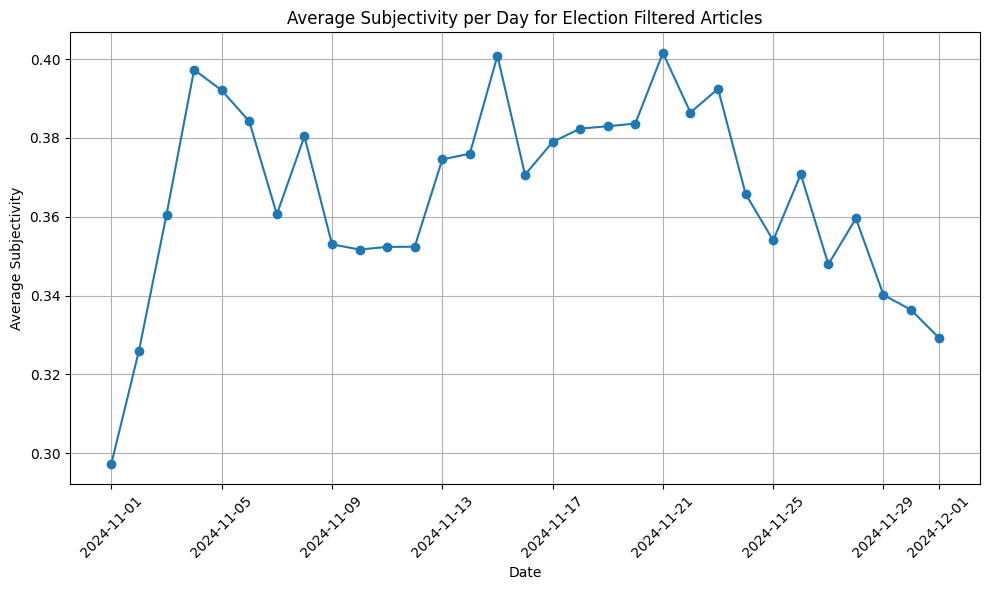

In [67]:
election_df['date'] = election_df['publishedAt'].dt.date

average_subjectivity_per_day = election_df.groupby('date')['subjectivity'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_subjectivity_per_day.plot(kind='line', marker='o')
plt.title('Average Subjectivity per Day for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

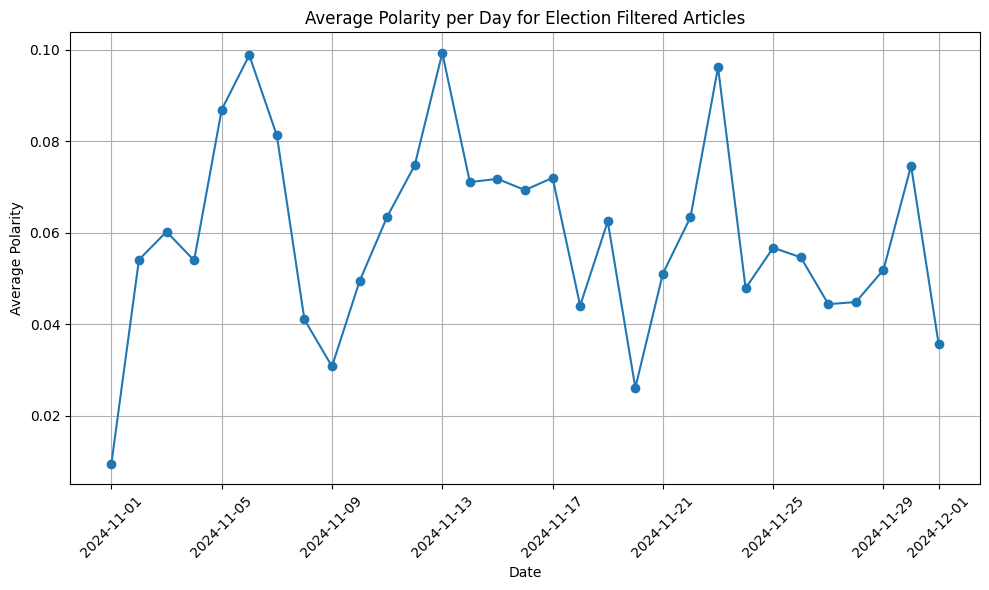

In [68]:
election_df['date'] = election_df['publishedAt'].dt.date

average_subjectivity_per_day = election_df.groupby('date')['polarity'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
average_subjectivity_per_day.plot(kind='line', marker='o')
plt.title('Average Polarity per Day for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

['Left' 'Middle' nan 'Right']


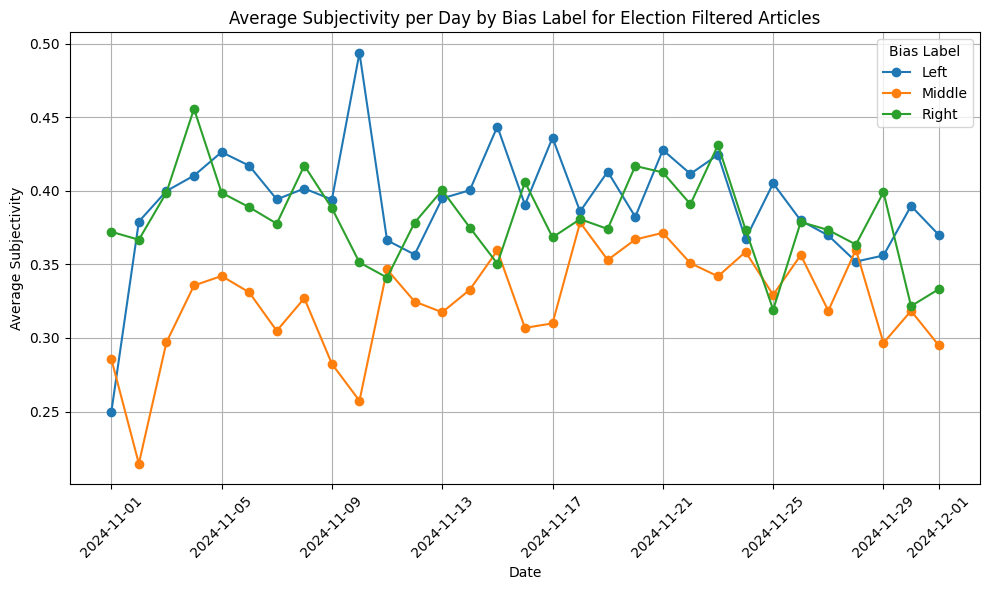

In [ ]:
bias_mapping = {
    'Skews Left': 'Left',
    'Strong Left': 'Left',
    'Hyper-Partisan Left': 'Left',
    'Skews Right': 'Right',
    'Strong Right': 'Right',
    'Hyper-Partisan Right': 'Right',
    'Middle': 'Middle'
}

election_df['bias_label'] = election_df['bias_label'].replace(bias_mapping)
print(election_df['bias_label'].unique())
average_subjectivity_per_group = election_df.groupby(['date', 'bias_label'])['subjectivity'].mean().reset_index()
pivot_data = average_subjectivity_per_group.pivot(index='date', columns='bias_label', values='subjectivity')

plt.figure(figsize=(10, 6))
for bias_label in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[bias_label], marker='o', label=bias_label)

plt.title('Average Subjectivity per Day by Bias Label for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Subjectivity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Bias Label')
plt.tight_layout()
plt.show()




['Left' 'Middle' nan 'Right']


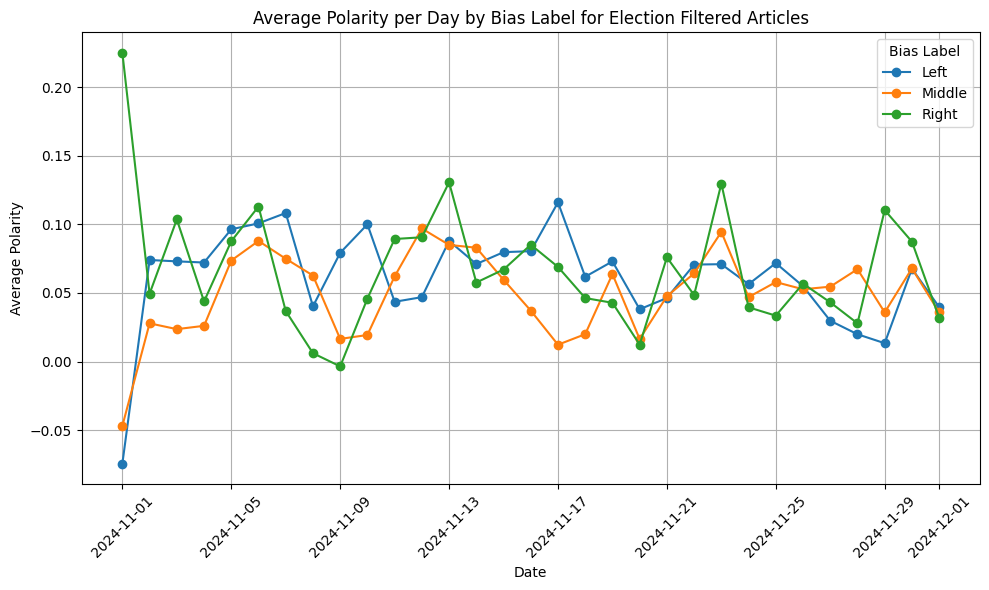

In [90]:
print(election_df['bias_label'].unique())
average_subjectivity_per_group = election_df.groupby(['date', 'bias_label'])['polarity'].mean().reset_index()
pivot_data = average_subjectivity_per_group.pivot(index='date', columns='bias_label', values='polarity')

plt.figure(figsize=(10, 6))
for bias_label in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[bias_label], marker='o', label=bias_label)

plt.title('Average Polarity per Day by Bias Label for Election Filtered Articles')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Bias Label')
plt.tight_layout()
plt.show()


['Left' 'Middle' nan 'Right']


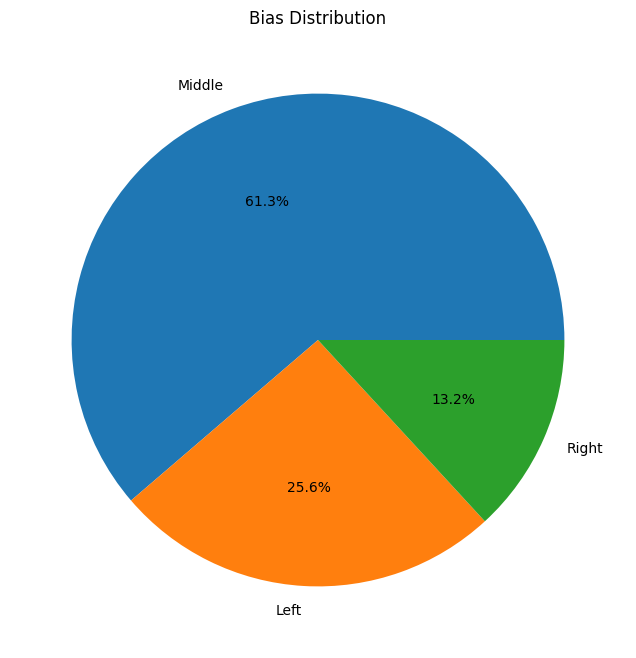

In [91]:
bias_mapping = {
    'Skews Left': 'Left',
    'Strong Left': 'Left',
    'Hyper-Partisan Left': 'Left',
    'Skews Right': 'Right',
    'Strong Right': 'Right',
    'Hyper-Partisan Right': 'Right',
    'Middle': 'Middle'
}

newsapi_df['bias_label'] = newsapi_df['bias_label'].replace(bias_mapping)
print(election_df['bias_label'].unique())

bias_distribution = newsapi_df['bias_label'].value_counts()
bias_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Bias Distribution')
plt.ylabel('')
plt.show()